In [2]:
import numpy as np
import pandas as pd

In [3]:
data_full = pd.read_csv('books.csv',on_bad_lines='skip')

In [4]:
data_full.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [6]:
data_st1=data_full[np.mean( data_full['ratings_count'])*0.01<=data_full['ratings_count']]

In [7]:
data_st1.reset_index(drop=True,inplace=True)

In [8]:
data_st1

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
7694,45626,O Príncipe Caspian (As Crónicas de Nárnia #4),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.97,9722330977,9789722330978,por,160,215,11,10/11/2003,Editorial Presença
7695,45630,Whores for Gloria,William T. Vollmann,3.69,0140231579,9780140231571,en-US,160,932,111,2/1/1994,Penguin Books
7696,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
7697,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books


In [9]:
data_st1.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [10]:
data_st2 = data_st1[['  num_pages','authors','publisher','average_rating']]

In [11]:
data_st2['average_rating'].dropna(inplace=True)
data_st2['  num_pages'].dropna(inplace=True)

/tmp/ipykernel_9147/4223596945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_st2['average_rating'].dropna(inplace=True)
/tmp/ipykernel_9147/4223596945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_st2['  num_pages'].dropna(inplace=True)


In [12]:
pages=data_st2['  num_pages'].to_numpy(dtype='int')

In [13]:
data_size= pd.DataFrame( map(lambda x: 'big' if x>=pages.mean() else 'small',pages))

In [14]:
rat=data_st2['average_rating'].to_numpy(dtype='float')

In [15]:
data_rat= pd.DataFrame(map(lambda x: 'good' if x>=rat.mean() else 'not so good',rat),dtype='str')

In [16]:
data_st2['quality']=data_rat

/tmp/ipykernel_9147/736414143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_st2['quality']=data_rat


In [17]:
data_st2['size']=data_size

/tmp/ipykernel_9147/2712630900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_st2['size']=data_size


In [19]:
data_final = data_st2.drop(columns=['  num_pages','average_rating'])

In [20]:
data_final.head(20)

,authors,publisher,quality,size
0,J.K. Rowling/Mary GrandPré,Scholastic Inc.,good,big
1,J.K. Rowling/Mary GrandPré,Scholastic Inc.,good,big
2,J.K. Rowling,Scholastic,good,small
3,J.K. Rowling/Mary GrandPré,Scholastic Inc.,good,big
4,J.K. Rowling/Mary GrandPré,Scholastic,good,big
5,J.K. Rowling,Scholastic,good,big
6,Douglas Adams,Gramercy Books,good,big
7,Douglas Adams,Del Rey Books,good,big
8,Douglas Adams,Crown,good,small
9,Douglas Adams/Stephen Fry,Random House Audio,good,small


In [31]:
auths = list(map(lambda x :tuple(x.split("/")), data_final['authors']))

AttributeError: 'list' object has no attribute 'split'

In [32]:
pubs = list(map(lambda x :x.split("/"), data_final['publisher']))

In [35]:
from functools import reduce

In [45]:
words=set(reduce(lambda x, y: x+y,pubs,[]))

In [50]:
from collections import defaultdict

duplicates = defaultdict(set)
for w1 in words:
    for w2 in words:
        if w1 != w2 and (w1.lower() in w2.lower() or w2.lower() in w1.lower()):
            duplicates[w1].add(w2)

In [52]:
len(duplicates)

1013

In [55]:
data_final.columns

Index(['authors', 'publisher', 'quality', 'size'], dtype='object')

In [ ]:


data_final['authors'] = auths

In [29]:
list(filter ( lambda x : x.find('Inc.')>=0, data_final['publisher']))

['Scholastic Inc.',
 'Scholastic Inc.',
 'Scholastic Inc.',
 'HarperCollins Publishers  Inc.',
 'Hackett Publishing Company  Inc.',
 'Hackett Publishing Company  Inc.',
 'Hackett Publishing Company  Inc.',
 'Hackett Publishing Company  Inc.',
 'Hackett Publishing Company  Inc.',
 'William Morrow & Company  Inc.',
 'Scholastic  Inc.',
 'Scholastic  Inc.',
 'Hackett Publishing Company  Inc.',
 'F & W Publications Inc.',
 'Hackett Publishing Company  Inc.',
 'Harcourt  Inc.(Harvest Book)',
 'Scholastic Inc.',
 'Blackwell Publishing  Inc.',
 'Grove/Atlantic  Inc.',
 'Dover Publications  Inc.',
 'Random House  Inc.',
 'Hackett Publishing Company  Inc.',
 'Arthur A. Levine Books / Scholastic Inc.',
 'Hackett Publishing Company  Inc.',
 'Hackett Publishing Company  Inc.',
 'Hackett Publishing Company  Inc.',
 'Scholastic  Inc.',
 'Hackett Publishing Company  Inc.',
 'A Harvest Book/Harcourt  Inc.',
 'Pocket Books / Simon & Schuster  Inc.',
 'Scholastic Inc.',
 'Scholastic Inc.',
 'Scholastic 

In [30]:
list(filter ( lambda x : x.find('Bantam Books')>=0, data_final['publisher']))

['Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Spectra/Bantam Books (NYC)',
 'Bantam Books (NY)',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books (NY)',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books',
 'Bantam Books  Inc.',
 'Bantam Books']

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [66]:
pub_tup = list(map(lambda x: tuple(x) ,pubs))

In [67]:
data['publisher']=pub_tup

In [68]:
auth_tup = list(map(lambda x: tuple(x) ,auths))

In [69]:
data['authors']=auth_tup

In [70]:
label_encoders = {}
for col in ["authors", "publisher", "size", "quality"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store encoders for inverse transform


In [72]:
data=data

In [73]:
X = data.drop(columns=["quality"])  # Features
y = data["quality"]  # Target


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [76]:
y_pred = model.predict(X_test)


In [77]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5487012987012987


In [81]:
# Decode Predictions
decoded_preds = label_encoders["quality"].inverse_transform(y_pred)
print("Predicted Quality:", decoded_preds[750])

Predicted Quality: good


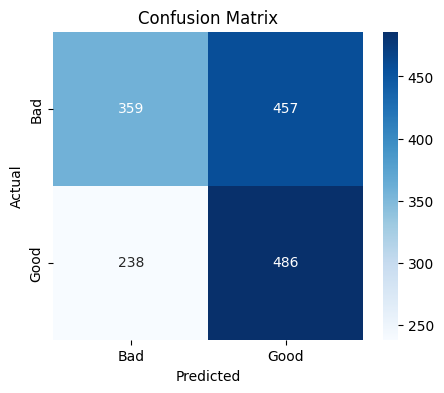

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
